In [2]:
import pandas as pd

In [3]:
data=pd.read_excel("D:\DOC\TajRupt\Statistics\datasets\somontj_cleaned.xlsx")

In [5]:
data.head(10)

,city,cost,market,market_code,remodel,rooms,floor,area,address
0,Душанбе,2850000,Новостройка,1,Новый ремонт,3,15,200,Центр
1,Душанбе,2000000,Новостройка,1,Новый ремонт,5,5,200,Сомони
2,Душанбе,1800000,Новостройка,1,Без ремонта (коробка),3,5,200,Центр Рудаки Плаза Сафо
3,Душанбе,450000,Вторичный рынок,2,С ремонтом,6,1,200,Фирдавсй
4,Душанбе,430000,Вторичный рынок,2,С ремонтом,5,1,200,Фирдавси
5,Душанбе,1500000,Новостройка,1,Новый ремонт,6,10,197,Профсоюз
6,Душанбе,1076000,Новостройка,1,Без ремонта (коробка),3,6,195,82 микрорайон
7,Душанбе,720000,Новостройка,1,С ремонтом,3,6,195,Фирдавси
8,Душанбе,650000,Новостройка,1,С ремонтом,3,6,195,Фирдавси
9,Душанбе,1638000,Новостройка,1,Без ремонта (коробка),6,4,195,Ориентир Кафе Сорбон


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8415 entries, 0 to 8414
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   city         8415 non-null   object
 1   cost         8415 non-null   int64 
 2   market       8415 non-null   object
 3   market_code  8415 non-null   int64 
 4   remodel      8415 non-null   object
 5   rooms        8415 non-null   int64 
 6   floor        8415 non-null   int64 
 7   area         8415 non-null   int64 
 8   address      8054 non-null   object
dtypes: int64(5), object(4)
memory usage: 591.8+ KB


In [21]:
data.columns

Index(['city', 'cost', 'market_code', 'rooms', 'floor', 'area',
       'remodel_code'],
      dtype='object')

In [8]:
data=data.drop(['address'], axis=1)

In [10]:
data=data.drop(['market'], axis=1)

In [16]:
data["remodel"].value_counts()

С ремонтом               3319
Без ремонта (коробка)    3011
Новый ремонт             2085
Name: remodel, dtype: int64

In [17]:
data.at[data['remodel'] == 'Без ремонта (коробка)', 'remodel_code'] = 0
data.at[data['remodel'] == 'С ремонтом', 'remodel_code'] = 1
data.at[data['remodel'] == 'Новый ремонт', 'remodel_code'] = 2

In [19]:
data=data.drop(['remodel'], axis=1)

In [23]:
data=data.drop(['city'], axis=1)

In [31]:
data

,cost,market_code,rooms,floor,area,remodel_code
0,2850000,1,3,15,200,2.0
1,2000000,1,5,5,200,2.0
2,1800000,1,3,5,200,0.0
3,450000,2,6,1,200,1.0
4,430000,2,5,1,200,1.0
...,...,...,...,...,...,...
8410,207000,1,1,2,22,2.0
8411,208000,1,1,2,22,1.0
8412,185000,1,1,10,21,2.0
8413,210000,2,2,2,21,0.0


Зависимая переменная - cost          
Независимые переменные- остальные

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8415 entries, 0 to 8414
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cost          8415 non-null   int64  
 1   market_code   8415 non-null   int64  
 2   rooms         8415 non-null   int64  
 3   floor         8415 non-null   int64  
 4   area          8415 non-null   int64  
 5   remodel_code  8415 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 394.6 KB


In [26]:
data.cost.describe()

count    8.415000e+03
mean     4.849912e+05
std      3.563885e+05
min      1.000000e+05
25%      2.970000e+05
50%      4.150000e+05
75%      5.800000e+05
max      1.000000e+07
Name: cost, dtype: float64

<AxesSubplot: >

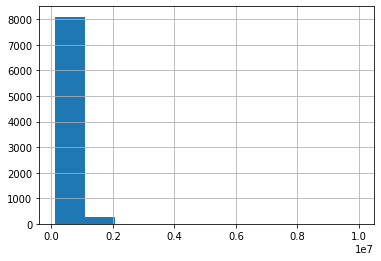

In [27]:
data.cost.hist()

<AxesSubplot: >

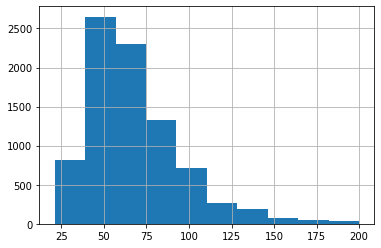

In [28]:
data.area.hist()

<AxesSubplot: >

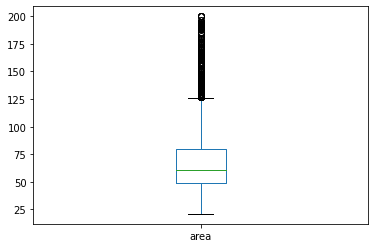

In [29]:
data.area.plot(kind="box")

<AxesSubplot: >

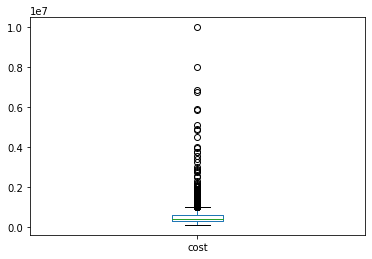

In [32]:
data["cost"].plot(kind="box")

In [33]:
import matplotlib.pyplot as plt

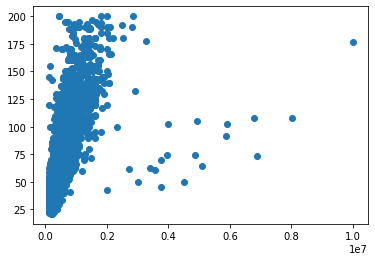

In [35]:
plt.scatter(data.cost, data.area)

In [38]:
import seaborn as sns  

<AxesSubplot: xlabel='rooms', ylabel='cost'>

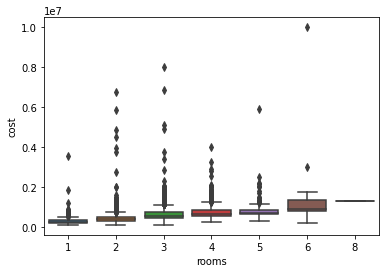

In [39]:
sns.boxplot(x=data.rooms, y=data.cost)

In [40]:
data.rooms.value_counts()

2    3446
3    2178
1    1991
4     565
5     185
6      49
8       1
Name: rooms, dtype: int64

<AxesSubplot: >

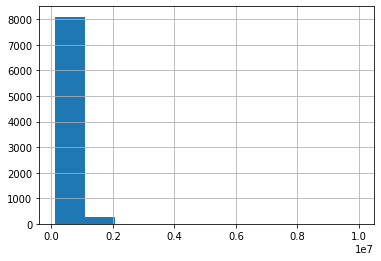

In [41]:
data.cost.hist()

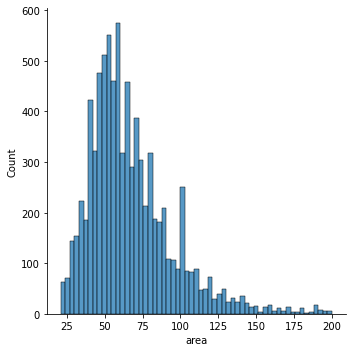

In [43]:
sns.displot(data.area)

In [44]:
data.corr()

,cost,market_code,rooms,floor,area,remodel_code
cost,1.000000,-0.028484,0.478773,0.030490,0.606861,0.170314
market_code,-0.028484,1.000000,0.215690,-0.469698,-0.208882,0.205640
rooms,0.478773,0.215690,1.000000,-0.084324,0.672081,0.160269
floor,0.030490,-0.469698,-0.084324,1.000000,0.217234,-0.238361
area,0.606861,-0.208882,0.672081,0.217234,1.000000,-0.064904
remodel_code,0.170314,0.205640,0.160269,-0.238361,-0.064904,1.000000


<AxesSubplot: >

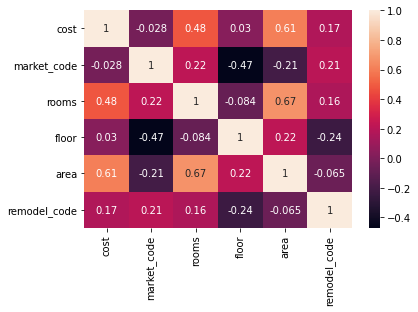

In [46]:
sns.heatmap(data.corr(), annot=True)

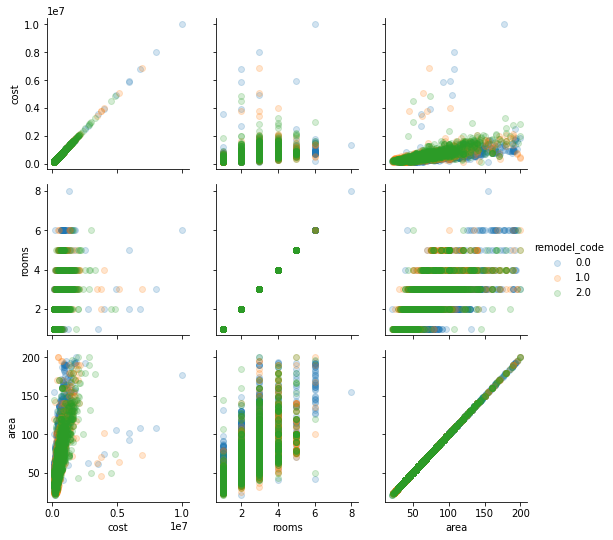

In [50]:
matrix=sns.PairGrid(data, vars=['cost', 'rooms', 'area'], hue="remodel_code")
matrix.map(plt.scatter, alpha=0.2)
matrix.add_legend()

Splitting

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score 

In [52]:
y=data.cost

In [53]:
X=data.drop(["cost"], axis=1)

In [54]:
y

0       2850000
1       2000000
2       1800000
3        450000
4        430000
         ...   
8410     207000
8411     208000
8412     185000
8413     210000
8414     210000
Name: cost, Length: 8415, dtype: int64

In [55]:
X

,market_code,rooms,floor,area,remodel_code
0,1,3,15,200,2.0
1,1,5,5,200,2.0
2,1,3,5,200,0.0
3,2,6,1,200,1.0
4,2,5,1,200,1.0
...,...,...,...,...,...
8410,1,1,2,22,2.0
8411,1,1,2,22,1.0
8412,1,1,10,21,2.0
8413,2,2,2,21,0.0


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

In [58]:
X_test

,market_code,rooms,floor,area,remodel_code
220,1,2,10,138,2.0
3356,2,3,2,68,1.0
4320,1,2,10,60,0.0
8052,1,1,6,32,0.0
1740,2,2,5,85,1.0
...,...,...,...,...,...
3534,1,2,6,66,2.0
6882,1,1,5,45,1.0
8068,1,1,3,32,2.0
7785,2,2,4,36,1.0


In [59]:
# Gradient Boosting Regression Model   
gbr = GradientBoostingRegressor()     # Creating an object of Gradient Boosting Regressor class 
gbr.fit(X_train, y_train) 
#calculating the metrics for the model  
y_pred = gbr.predict(X_test) 
mse = mean_squared_error(y_test, y_pred) 
r2 = r2_score(y_test, y_pred)  
print("Mean Squared Error:", mse)  
print("R-Squared:", r2)

Mean Squared Error: 58038891327.95676
R-Squared: 0.4607233017876923


In [65]:
X_test.head()

,market_code,rooms,floor,area,remodel_code
220,1,2,10,138,2.0
3356,2,3,2,68,1.0
4320,1,2,10,60,0.0
8052,1,1,6,32,0.0
1740,2,2,5,85,1.0


In [68]:
print("Цена квартиры:", gbr.predict([[1, 3, 9, 112, 0]]))

Цена квартиры: [725500.56376592]


C:\Users\Loiq\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


Деплоинг

In [60]:
import pickle

In [61]:
pickle_out=open("somontjHouseAssesment.pkl", "wb")


In [62]:
pickle.dump(gbr, pickle_out)

In [63]:
pickle_out.close()